#ABOUT DATASET


Attribute Information:
- holiday: Categorical US National holidays plus regional holiday, Minnesota
- State Fair
- temp: Numeric Average temp in kelvin
- rain_1h: Numeric Amount in mm of rain that occurred in the hour
- snow_1h: Numeric Amount in mm of snow that occurred in the hour
- clouds_all: Numeric Percentage of cloud cover
- weather_main: Categorical Short textual description of the current weather
- weather_description: Categorical Longer textual description of the current weather
- date_time: DateTime Hour of the data collected in local CST time
- traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import pandas as pd

# Upload the CSV file
data = pd.read_csv("./metro_traffic/Metro_Interstate_Traffic_Volume.csv")  
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GIS/Metro_Interstate_Traffic_Volume.csv")
data.head()


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [2]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [3]:
data.shape

(48204, 9)

In [4]:
data.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00


In [7]:
data.dtypes

traffic_volume           int64
holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
dtype: object

In [8]:
data['holiday'] = data['holiday'].fillna('No')
data.count()

traffic_volume         48204
holiday                48204
temp                   48204
rain_1h                48204
snow_1h                48204
clouds_all             48204
weather_main           48204
weather_description    48204
date_time              48204
dtype: int64

In [9]:
print("max date :" + data.date_time.max())
print("min date :" + data.date_time.min())

max date :31-12-2017 23:00
min date :01-01-2013 00:00


#EDA

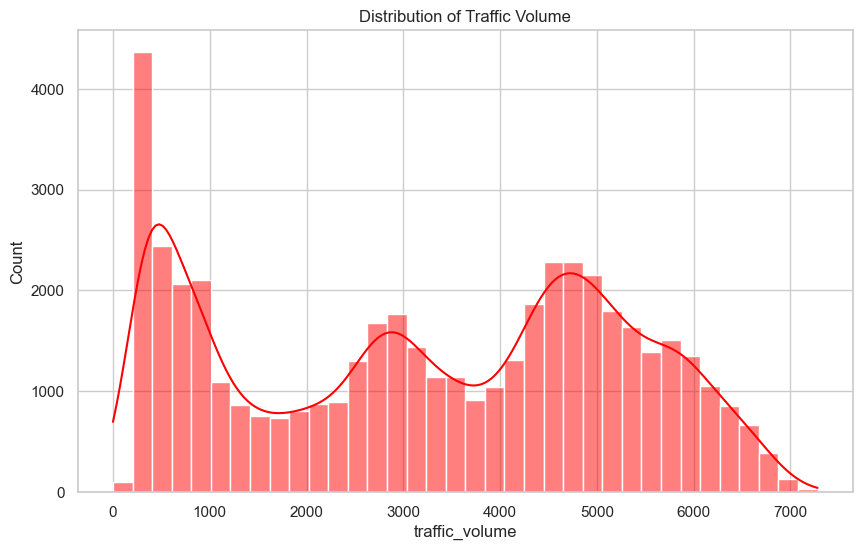

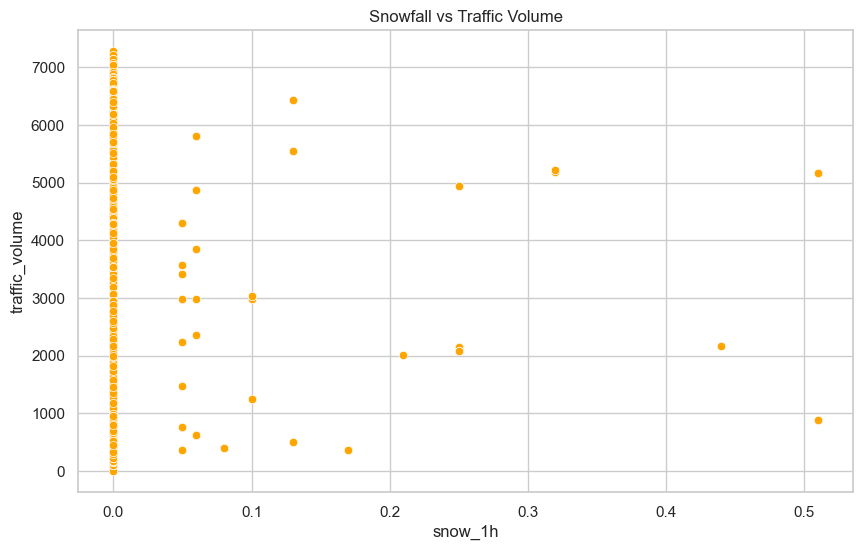

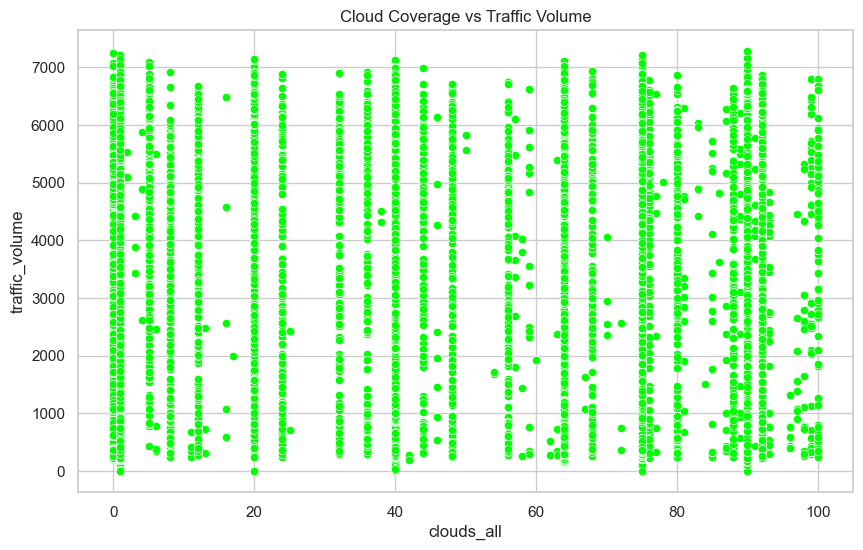

C:\Users\dell\AppData\Local\Temp\ipykernel_28956\2076841034.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='weather_main', data=data, palette='viridis') # Changed df to data


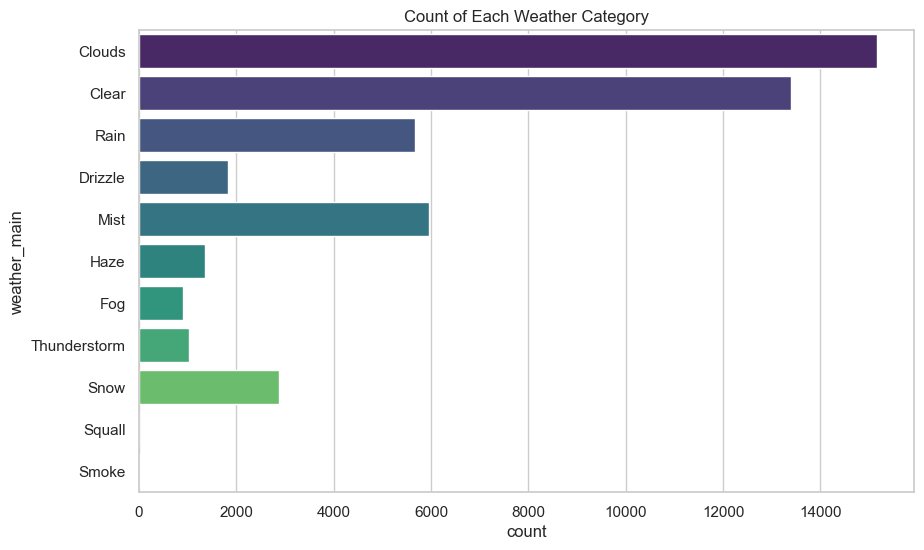

In [10]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set(style="whitegrid")

# Plotting the distribution of traffic_volume
plt.figure(figsize=(10,6))
sns.histplot(data['traffic_volume'], color='red', kde=True) # Changed df to data
plt.title('Distribution of Traffic Volume')
plt.show()

# Plotting the relationship between snow_1h and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='snow_1h', y='traffic_volume', data=data, color='orange') # Changed df to data
plt.title('Snowfall vs Traffic Volume')
plt.show()

# Plotting the relationship between clouds_all and traffic_volume
plt.figure(figsize=(10,6))
sns.scatterplot(x='clouds_all', y='traffic_volume', data=data, color='lime') # Changed df to data
plt.title('Cloud Coverage vs Traffic Volume')
plt.show()

# Plotting the count of each weather_main category
plt.figure(figsize=(10,6))
sns.countplot(y='weather_main', data=data, palette='viridis') # Changed df to data
plt.title('Count of Each Weather Category')
plt.show()

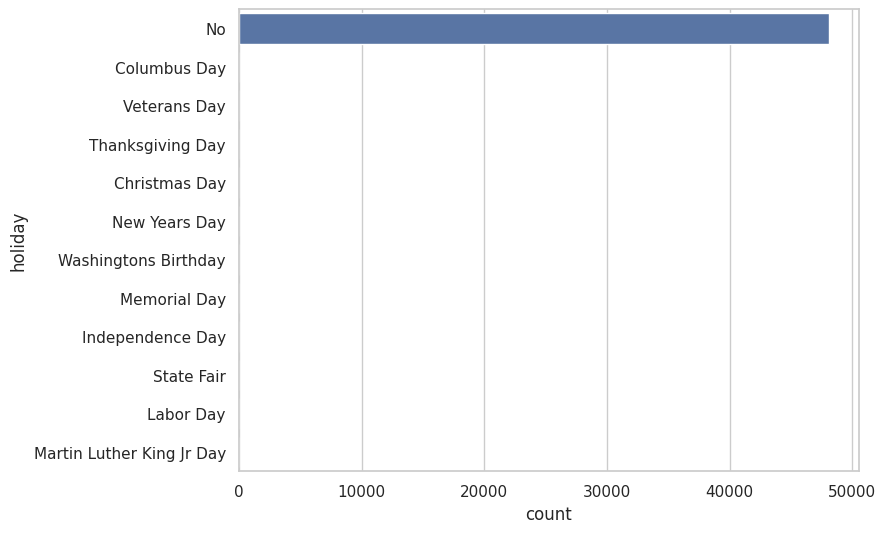

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = data)
plt.show()

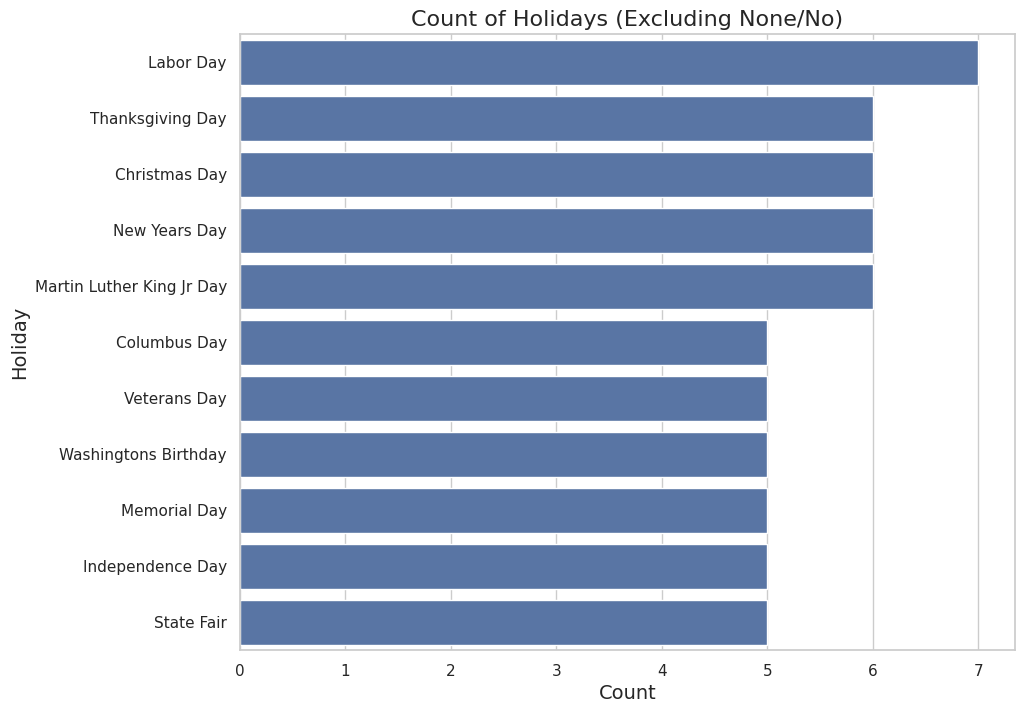

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `data` is your DataFrame with the column `holiday`.
# Filter out rows where 'holiday' is 'None', 'No', or NaN
holidays = data.loc[~data['holiday'].isin(['None', 'No']) & data['holiday'].notna()]

plt.figure(figsize=(10, 8))  # Set figure size
sns.countplot(y='holiday', data=holidays, order=holidays['holiday'].value_counts().index)  # Sort by frequency
plt.title('Count of Holidays (Excluding None/No)', fontsize=16)  # Add title
plt.xlabel('Count', fontsize=14)  # Label for x-axis
plt.ylabel('Holiday', fontsize=14)  # Label for y-axis
plt.show()


<Axes: xlabel='count', ylabel='weather_main'>

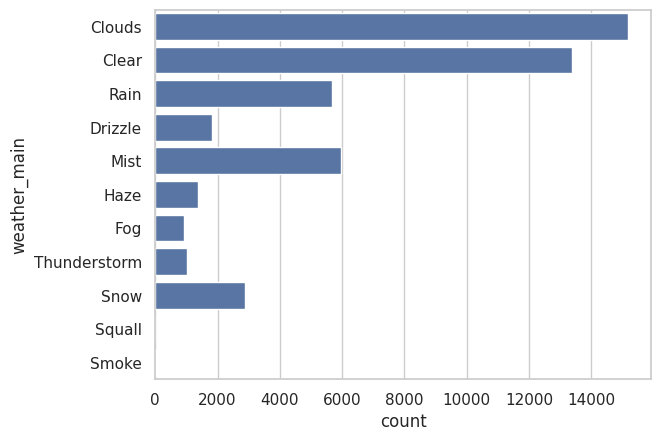

In [13]:
sns.countplot(y='weather_main', data=data)

<Axes: xlabel='traffic_volume', ylabel='temp'>

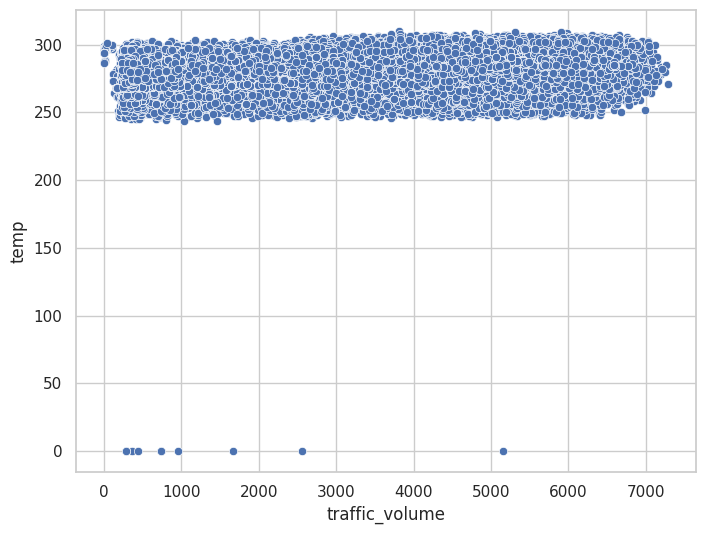

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='traffic_volume', y='temp', data = data.loc[data.temp>-50])

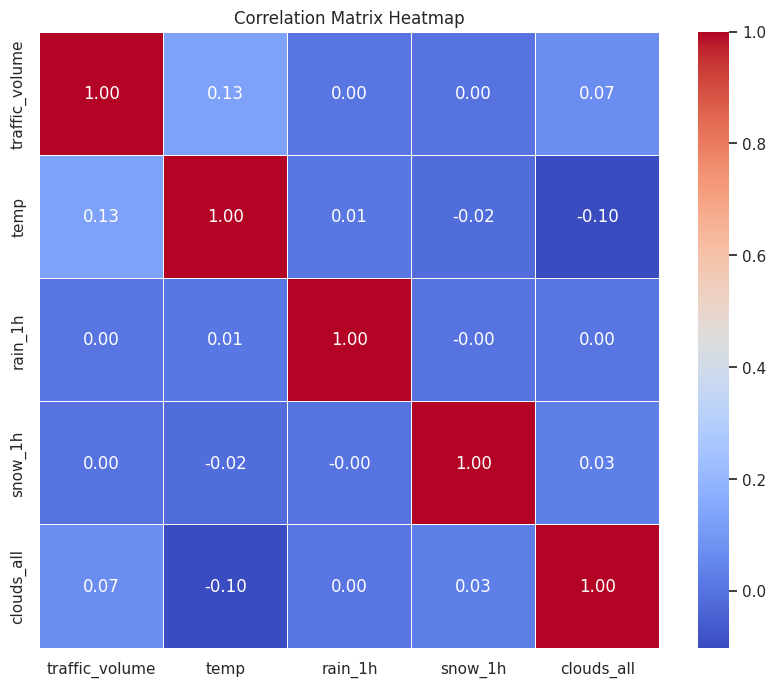

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Make sure pandas is imported

# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Matrix Heatmap")

# Show the plot
plt.show()

#Convert the specified columns to categorical data type

In [12]:
import pandas as pd

# Reload the dataset after the reset
file_path = './metro_traffic/Metro_Interstate_Traffic_Volume.csv'
# file_path = '/content/drive/MyDrive/Colab Notebooks/GIS/Metro_Interstate_Traffic_Volume.csv'
data = pd.read_csv(file_path)

# Check the statistical distribution of the relevant columns
rain_stats = data['rain_1h'].describe()
snow_stats = data['snow_1h'].describe()
clouds_stats = data['clouds_all'].describe()

# Identify unique values for categorization
rain_unique = data['rain_1h'].unique()
snow_unique = data['snow_1h'].unique()
clouds_unique = data['clouds_all'].unique()

rain_stats, snow_stats, clouds_stats, rain_unique[:10], snow_unique[:10], clouds_unique[:10]

(count    48204.000000
 mean         0.334264
 std         44.789133
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max       9831.300000
 Name: rain_1h, dtype: float64,
 count    48204.000000
 mean         0.000222
 std          0.008168
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          0.510000
 Name: snow_1h, dtype: float64,
 count    48204.000000
 mean        49.362231
 std         39.015750
 min          0.000000
 25%          1.000000
 50%         64.000000
 75%         90.000000
 max        100.000000
 Name: clouds_all, dtype: float64,
 array([0.  , 0.25, 0.57, 0.38, 0.3 , 0.29, 0.44, 0.36, 2.16, 3.39]),
 array([0.  , 0.51, 0.32, 0.06, 0.05, 0.21, 0.25, 0.44, 0.13, 0.1 ]),
 array([ 40,  75,  90,   1,  20,   0, 100,  92,  99,  81], dtype=int64))

Thống kê cơ bản:
rain_1h (lượng mưa trong 1 giờ):
- Mean: 0.33 mm (phần lớn giá trị là 0, cho thấy ít mưa hoặc không có mưa thường xuyên).
- Max: 9831.3 mm (giá trị này có thể là ngoại lệ cần xử lý).
- Median (50%): 0.0 mm (đa số không có mưa).
- Giá trị phổ biến: 0.0 mm.

snow_1h (lượng tuyết trong 1 giờ):
- Mean: 0.00022 mm (phần lớn giá trị là 0, tuyết hiếm gặp).
- Max: 0.51 mm (rất nhỏ).
- Giá trị phổ biến: 0.0 mm.

clouds_all (mức độ mây che phủ):
- Mean: 49.36% (bầu trời trung bình là một nửa bị che phủ bởi mây).
- Min: 0% (trời quang).
- Max: 100% (trời mây hoàn toàn).
- Median (50%): 64%.


In [13]:
# Chuyển đổi rain_1h
data['rain_1h'] = data['rain_1h'].apply(lambda x:
    'No Rain' if x == 0 else
    'Light Rain' if x <= 10 else
    'Moderate Rain' if x <= 50 else
    'Heavy Rain')

# Chuyển đổi snow_1h
data['snow_1h'] = data['snow_1h'].apply(lambda x:
    'No Snow' if x == 0 else
    'Light Snow' if x <= 0.1 else
    'Heavy Snow')

# Chuyển đổi clouds_all
data['clouds_all'] = data['clouds_all'].apply(lambda x:
    'Clear' if x <= 20 else
    'Partly Cloudy' if x <= 50 else
    'Mostly Cloudy' if x <= 80 else
    'Overcast')

# Xem trước dữ liệu sau chuyển đổi
data[['rain_1h', 'snow_1h', 'clouds_all']].head()


,rain_1h,snow_1h,clouds_all
0,No Rain,No Snow,Partly Cloudy
1,No Rain,No Snow,Mostly Cloudy
2,No Rain,No Snow,Overcast
3,No Rain,No Snow,Overcast
4,No Rain,No Snow,Mostly Cloudy


rain_1h:
- 0 mm: "No Rain".
- 0.01 - 10 mm: "Light Rain".
- 10 - 50 mm: "Moderate Rain".
- lớn hơn 50 mm: "Heavy Rain".

snow_1h:
- 0 mm: "No Snow".
- 0.01 - 0.1 mm: "Light Snow".
- lớn hơn 0.1 mm: "Heavy Snow".

clouds_all:
- 0 - 20%: "Clear".
- 21 - 50%: "Partly Cloudy".
- 51 - 80%: "Mostly Cloudy".
- 81 - 100%: "Overcast".

In [14]:
data.columns

Index(['traffic_volume', 'holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'date_time'],
      dtype='object')

In [15]:
data.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,No Rain,No Snow,Partly Cloudy,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,No Rain,No Snow,Mostly Cloudy,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,No Rain,No Snow,Overcast,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,No Rain,No Snow,Overcast,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,No Rain,No Snow,Mostly Cloudy,Clouds,broken clouds,02-10-2012 13:00


#Feature Engineering

In [16]:
# Replace 'date_time' with the actual column name from your CSV file if it's different
data['date_time'] = pd.to_datetime(data['date_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# You may also need to adjust the format string (%Y-%m-%d %H:%M:%S is a common format)
data['day'] = data['date_time'].dt.day_name()
data['month'] = data['date_time'].dt.month
data['year'] = data['date_time'].dt.year
data['hour'] = data['date_time'].dt.hour

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.weather_description = le.fit_transform(data.weather_description)
data.weather_main = le.fit_transform(data.weather_main)
data.holiday = le.fit_transform(data.holiday)
data.day=le.fit_transform(data.day)

data=data.drop(['date_time'],axis=1)

#Spliting the dataset

In [18]:
from sklearn.model_selection import train_test_split # Import the train_test_split function

x = data.drop('traffic_volume',axis = 1)
y = data['traffic_volume']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Model

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Import LinearRegression, Ridge, and Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'xGBoost': XGBRegressor(),
}

**Model optimization**

In [22]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Import necessary metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Phân chia dữ liệu thành đầu vào (X) và đầu ra (y)

# Phân chia dữ liệu train/test

# Tiền xử lý dữ liệu: OneHotEncoder cho cột categorical và StandardScaler cho cột numeric
categorical_features = ['rain_1h', 'snow_1h', 'clouds_all']
numerical_features = x_train.select_dtypes(include=['number']).columns  # Get numerical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),  # Handle unknown categories
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), numerical_features),
    ],
    remainder='passthrough'  # or drop if you don't want other columns
)

# Define parameter grids for models
param_grids = {
    'Ridge': {'model__alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'model__alpha': [0.001, 0.01, 0.1, 1.0]},
    'Decision Tree': {'model__max_depth': [5, 10, 20], 'model__min_samples_split': [2, 5, 10]},
    'RandomForest': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [10, 20, None]},
    'xGBoost': {'model__learning_rate': [0.01, 0.1], 'model__max_depth': [3, 6, 10], 'model__n_estimators': [50, 100]},
}

# Models dictionary
models = {
    'LinearRegression': Pipeline([('preprocessor', preprocessor), ('model', LinearRegression())]),
    'Ridge': Pipeline([('preprocessor', preprocessor), ('model', Ridge())]),
    'Lasso': Pipeline([('preprocessor', preprocessor), ('model', Lasso())]),
    'Decision Tree': Pipeline([('preprocessor', preprocessor), ('model', DecisionTreeRegressor())]),
    'RandomForest': Pipeline([('preprocessor', preprocessor), ('model', RandomForestRegressor())]),
    'xGBoost': Pipeline([('preprocessor', preprocessor), ('model', XGBRegressor(eval_metric='rmse'))]),
}



In [23]:
# Variables to store the best model and its performance
best_model_name = None
best_model = None
best_r2_score = float('-inf')

# Training and evaluation loop with detailed output
for model_name, pipeline in models.items():
    print(f"Optimizing {model_name}...")
    grid_params = param_grids.get(model_name, {})
    grid_search = GridSearchCV(pipeline, param_grid=grid_params, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Best model and parameters
    best_model_candidate = grid_search.best_estimator_

    # Make predictions
    pred_train = best_model_candidate.predict(x_train)
    pred_test = best_model_candidate.predict(x_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, pred_train)
    test_r2 = r2_score(y_test, pred_test)

    # Print detailed results
    print('--------------------------------------------------------------------')
    print(f'Model Name : {model_name}')
    print('Training Accuracy:')
    print(f'mean_absolute_error: {mean_absolute_error(y_train, pred_train):.4f}')
    print(f'mean_squared_error: {mean_squared_error(y_train, pred_train):.4f}')
    print(f'r2_score: {train_r2:.4f}')
    print()
    print('Testing Accuracy:')
    print(f'mean_absolute_error: {mean_absolute_error(y_test, pred_test):.4f}')
    print(f'mean_squared_error: {mean_squared_error(y_test, pred_test):.4f}')
    print(f'r2_score: {test_r2:.4f}')
    print()

    # Update best model if current model is better
    if test_r2 > best_r2_score:
        best_r2_score = test_r2
        best_model_name = model_name
        best_model = best_model_candidate

# Print the best model
print('====================================================================')
print(f"The best model is {best_model_name} with a testing r2_score of {best_r2_score:.4f}")
print("Best model parameters:")
print(best_model)

Optimizing LinearRegression...


d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


--------------------------------------------------------------------
Model Name : LinearRegression
Training Accuracy:
mean_absolute_error: 1697.7627
mean_squared_error: 3803588.8443
r2_score: 0.0361

Testing Accuracy:
mean_absolute_error: 1701.0490
mean_squared_error: 3811850.2189
r2_score: 0.0358

Optimizing Ridge...


d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


--------------------------------------------------------------------
Model Name : Ridge
Training Accuracy:
mean_absolute_error: 1697.8894
mean_squared_error: 3803756.4954
r2_score: 0.0360

Testing Accuracy:
mean_absolute_error: 1700.9188
mean_squared_error: 3810170.7044
r2_score: 0.0363

Optimizing Lasso...


d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


--------------------------------------------------------------------
Model Name : Lasso
Training Accuracy:
mean_absolute_error: 1697.8502
mean_squared_error: 3803732.8432
r2_score: 0.0360

Testing Accuracy:
mean_absolute_error: 1700.9547
mean_squared_error: 3810558.3245
r2_score: 0.0362

Optimizing Decision Tree...


d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


--------------------------------------------------------------------
Model Name : Decision Tree
Training Accuracy:
mean_absolute_error: 1671.4143
mean_squared_error: 3713810.0401
r2_score: 0.0588

Testing Accuracy:
mean_absolute_error: 1678.8400
mean_squared_error: 3731484.3978
r2_score: 0.0562

Optimizing RandomForest...


d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


--------------------------------------------------------------------
Model Name : RandomForest
Training Accuracy:
mean_absolute_error: 1598.4393
mean_squared_error: 3442581.9231
r2_score: 0.1276

Testing Accuracy:
mean_absolute_error: 1644.6368
mean_squared_error: 3630047.5710
r2_score: 0.0818

Optimizing xGBoost...


d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


--------------------------------------------------------------------
Model Name : xGBoost
Training Accuracy:
mean_absolute_error: 1613.4913
mean_squared_error: 3509674.3024
r2_score: 0.1106

Testing Accuracy:
mean_absolute_error: 1640.5064
mean_squared_error: 3613458.1186
r2_score: 0.0860

The best model is xGBoost with a testing r2_score of 0.0860
Best model parameters:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['rain_1h', 'snow_1h',
                                                   'clouds_all']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                 

In [48]:
data

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,5545,11,288.28,No Rain,No Snow,Partly Cloudy,1,24,0,NaN,NaN,NaN
1,4516,11,289.36,No Rain,No Snow,Mostly Cloudy,1,2,0,NaN,NaN,NaN
2,4767,11,289.58,No Rain,No Snow,Overcast,1,19,0,NaN,NaN,NaN
3,5026,11,290.13,No Rain,No Snow,Overcast,1,19,0,NaN,NaN,NaN
4,4918,11,291.14,No Rain,No Snow,Mostly Cloudy,1,2,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,3543,11,283.45,No Rain,No Snow,Mostly Cloudy,1,2,0,NaN,NaN,NaN
48200,2781,11,282.76,No Rain,No Snow,Overcast,1,19,0,NaN,NaN,NaN
48201,2159,11,282.73,No Rain,No Snow,Overcast,10,21,0,NaN,NaN,NaN
48202,1450,11,282.09,No Rain,No Snow,Overcast,1,19,0,NaN,NaN,NaN


In [56]:
test = data[:1]
test = test.drop(['traffic_volume'], axis='columns')
test

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,11,288.28,No Rain,No Snow,Partly Cloudy,1,24,0,NaN,NaN,NaN


In [57]:
result = best_model_candidate.predict(test)
result

d:\Probability\envs\deployment\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['month' 'year' 'hour']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([3581.9883], dtype=float32)

In [ ]:
import joblib
def save_file(file, path):
  joblib.dump(file, path)
  
save_path = 'best_model.joblib'
save_file(best_model_candidate, save_path)

### Visualization

Q1. Top 5 weather conditions that lead to the highest traffic volume

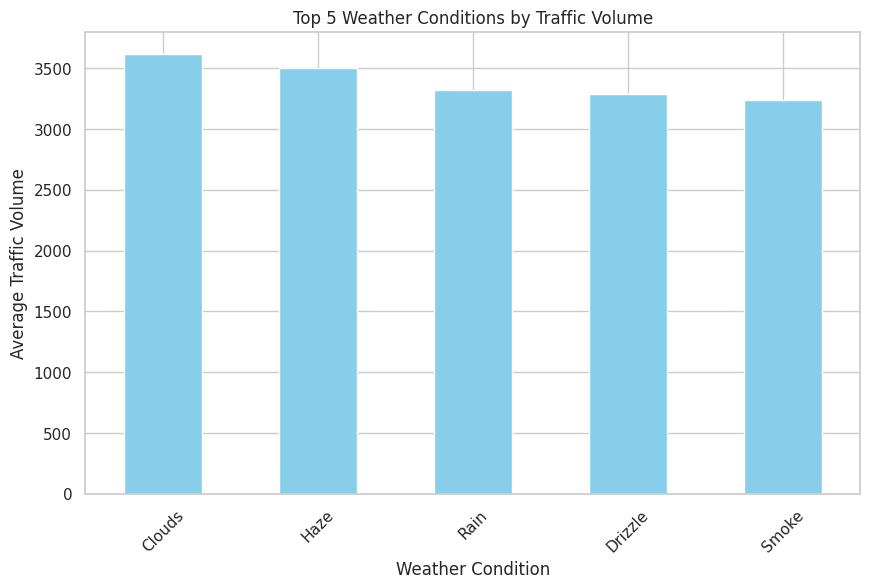

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GIS/Metro_Interstate_Traffic_Volume.csv')

# Group the data by weather_main and calculate the mean traffic volume
grouped_data = data.groupby('weather_main')['traffic_volume'].mean().sort_values(ascending=False)

# Select the top 5 weather conditions
top_5_weather = grouped_data.head(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_5_weather.plot(kind='bar', color='skyblue')
plt.title('Top 5 Weather Conditions by Traffic Volume')
plt.xlabel('Weather Condition')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()

Q2. The distribution of traffic volume throughout the day

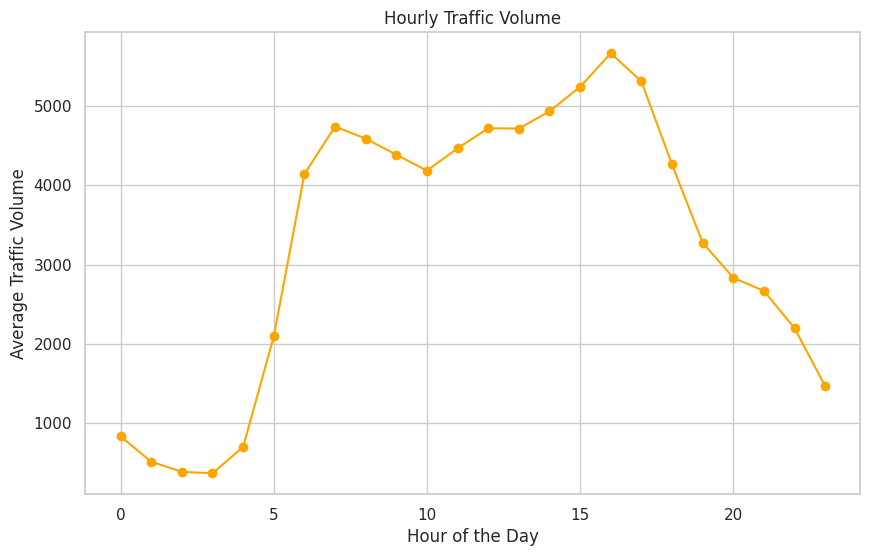

In [ ]:
# lấy hour từ date_time
data['date_time'] = pd.to_datetime(data['date_time'], format='%d-%m-%Y %H:%M', errors='coerce')  # Thống nhất format
data['hour'] = data['date_time'].dt.hour

# Group the data by hour and calculate the mean traffic volume
hourly_traffic = data.groupby('hour')['traffic_volume'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))
hourly_traffic.plot(kind='line', marker='o', color='orange')
plt.title('Hourly Traffic Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.grid(True)
plt.show()

Q3. Traffic volume vary across different holidays

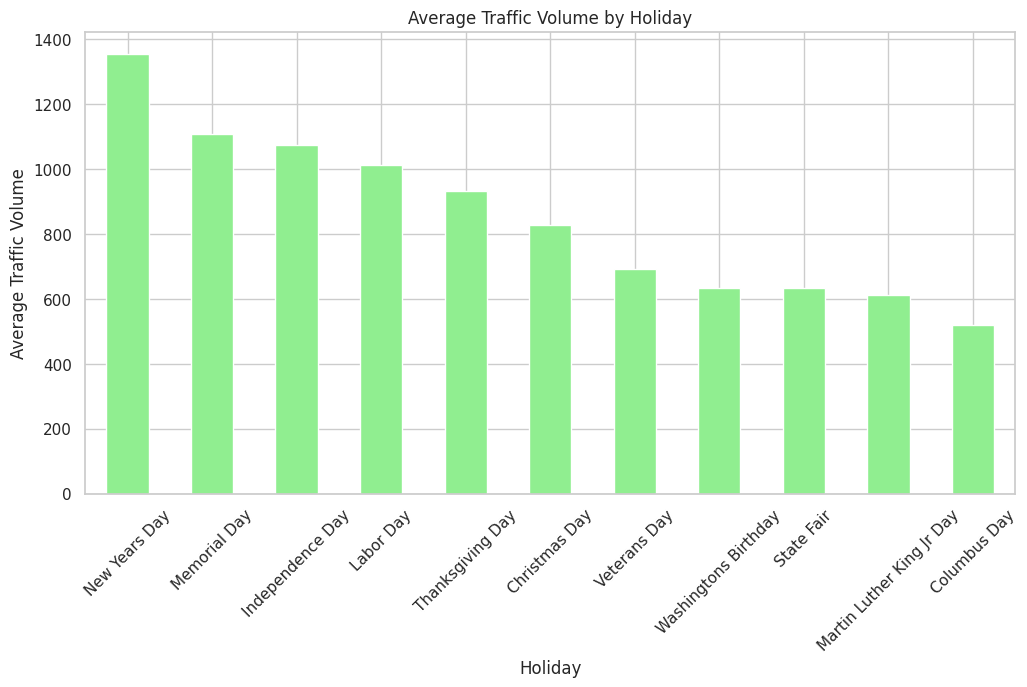

In [ ]:
# Group the data by holiday and calculate the mean traffic volume
holiday_traffic = data.groupby('holiday')['traffic_volume'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
holiday_traffic.plot(kind='bar', color='lightgreen')
plt.title('Average Traffic Volume by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=45)
plt.show()

Save model

In [ ]:
import pickle

# Save the best model to a file
model_filename = f"{best_model_name}_best_model.pkl"  # Tên file dựa trên tên model
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model has been saved to {model_filename}")


The best model has been saved to xGBoost_best_model.pkl


In [ ]:
from google.colab import files

# Tải file đã lưu về máy
files.download("xGBoost_best_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
import numpy as np

# Tải mô hình đã lưu từ file
model_filename = "xGBoost_best_model.pkl"
with open(model_filename, "rb") as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
data[['rain_1h', 'snow_1h', 'clouds_all']].head()

,rain_1h,snow_1h,clouds_all
0,No Rain,No Snow,Partly Cloudy
1,No Rain,No Snow,Mostly Cloudy
2,No Rain,No Snow,Overcast
3,No Rain,No Snow,Overcast
4,No Rain,No Snow,Mostly Cloudy


In [ ]:
# Load the dataset to analyze missing columns
file_path = '/content/Metro_Interstate_Traffic_Volume.csv'
data = pd.read_csv(file_path)

# Analyze the dataset to infer reasonable values for the missing columns
missing_columns = ['weather_main', 'holiday', 'day', 'month', 'year', 'weather_description', 'hour', 'temp']

# Analyze the statistical properties of these columns if present
column_analysis = {}
for column in missing_columns:
    if column in data.columns:
        column_analysis[column] = data[column].describe()
    else:
        column_analysis[column] = "Column not in dataset"

# Unique values for categorical columns
unique_values = {col: data[col].unique() if col in data.columns else "N/A" for col in missing_columns}

column_analysis, unique_values


({'weather_main': count      48204
  unique        11
  top       Clouds
  freq       15164
  Name: weather_main, dtype: object,
  'holiday': count            61
  unique           11
  top       Labor Day
  freq              7
  Name: holiday, dtype: object,
  'day': 'Column not in dataset',
  'month': 'Column not in dataset',
  'year': 'Column not in dataset',
  'weather_description': count            48204
  unique              38
  top       sky is clear
  freq             11665
  Name: weather_description, dtype: object,
  'hour': 'Column not in dataset',
  'temp': count    48204.000000
  mean       281.205870
  std         13.338232
  min          0.000000
  25%        272.160000
  50%        282.450000
  75%        291.806000
  max        310.070000
  Name: temp, dtype: float64},
 {'weather_main': array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
         'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object),
  'holiday': array([nan, 'Columbus Day', 'Vetera

In [ ]:
# Kiểm tra số lượng đặc trưng của mô hình
print(f"Expected features: {loaded_model.n_features_in_}")

Expected features: 11


In [ ]:
# Re-import necessary libraries
import pandas as pd
import pickle

# Load the dataset for reference
file_path = '/content/Metro_Interstate_Traffic_Volume.csv'  # Path to the dataset
data = pd.read_csv(file_path)

# Transform the columns based on the given thresholds
data['rain_1h'] = data['rain_1h'].apply(lambda x:
    'No Rain' if x == 0 else
    'Light Rain' if x <= 10 else
    'Moderate Rain' if x <= 50 else
    'Heavy Rain')

data['snow_1h'] = data['snow_1h'].apply(lambda x:
    'No Snow' if x == 0 else
    'Light Snow' if x <= 0.1 else
    'Heavy Snow')

data['clouds_all'] = data['clouds_all'].apply(lambda x:
    'Clear' if x <= 20 else
    'Partly Cloudy' if x <= 50 else
    'Mostly Cloudy' if x <= 80 else
    'Overcast')

# Display transformed columns
data_transformed_preview = data[['rain_1h', 'snow_1h', 'clouds_all']].head()

# Load the pre-trained model
best_model_path = 'xGBoost_best_model.pkl'  # Ensure the file exists in this path
try:
    with open(best_model_path, 'rb') as file:
        loaded_model = pickle.load(file)

    # Example single input values for prediction
    rain_category = 'Light Rain'
    snow_category = 'No Snow'
    clouds_category = 'Partly Cloudy'

    input_data = pd.DataFrame([[rain_category, snow_category, clouds_category]],
                              columns=['rain_1h', 'snow_1h', 'clouds_all'])

    # Predict using the loaded model
    prediction = loaded_model.predict(input_data)

    # Print the prediction
    print(f"Input Data: Rain='{rain_category}', Snow='{snow_category}', Clouds='{clouds_category}'")
    print("Predicted Traffic Volume:", prediction[0])

except FileNotFoundError:
    print(f"Model file not found at {best_model_path}. Please upload the model file.")


ValueError: columns are missing: {'weather_main', 'holiday', 'day', 'month', 'year', 'weather_description', 'hour', 'temp'}